In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from denn import *

In [2]:
ab = pd.read_csv('../data/dC_01.csv', header=None).values[0]
bestKnow = pd.read_csv('../data/Best_Know1Fxs.csv', header=None).values[0]

In [3]:
D = 10
frequency = 1_000
max_times = len(ab)
total_generations = max_times * frequency + 1000

def fitness_func(indiv): return (indiv.data**2).sum()
def constraint_func(indiv, b): return -b + sum((1/np.sqrt(D))*indiv.data)

population = Population.new_random(dimension=D)
opt = Optimization(population, fitness_func, constraint_func, constraint_params=[ab],
                   max_times=max_times, frequency=frequency, callbacks=DynamicConstraint)
opt.state_dict

{'gen': 0, 'evals': 0, 'time': 0, 'best': None}

A proper report should be shown here :)
Total time: 00:14


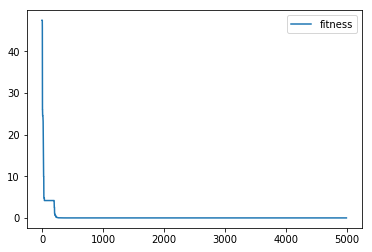

In [4]:
opt.run(total_generations, update_each=1000)

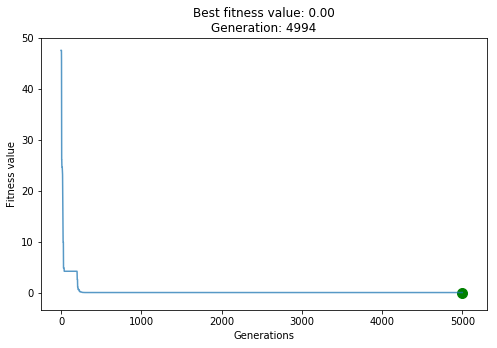

In [5]:
opt.recorder.plot()

In [6]:
opt.best

Individual(dimensions=10, lower_limit=-5, upper_limit=5, idx=7, gen=4998, fitness_value=1.441834898754818e-80, constraints=[-91.286], constraints_sum=0.0, is_feasible=True, data=array([ 1.01926932e-40,  7.48160877e-42,  1.27546134e-41,  2.90039282e-41,
       -1.82829890e-41, -4.63516186e-41, -1.67833377e-41,  4.20933162e-42,
       -9.60593167e-42, -9.74442988e-42]))